In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [3]:
# Dollar bars made of 15m time-based bars on btcusdt
df=pd.read_parquet('21.02_btcusdt_dollar_bar')

In [95]:
def getTEvents(gRaw, h):
    
    """
    The code is credited to Marcos Lopez de Prado.
    
    """
    tEvents, sPos, sNeg = [], 0, 0
    diff = np.log(gRaw).diff().dropna().abs()
    for i in diff.index[1:]:
        try:
            pos, neg = float(sPos+diff.loc[i]), float(sNeg+diff.loc[i])
        except Exception as e:
            print(e)
            print(sPos+diff.loc[i], type(sPos+diff.loc[i]))
            print(sNeg+diff.loc[i], type(sNeg+diff.loc[i]))
            break

        sPos, sNeg=max(0., pos), min(0., neg)
        if sNeg<-h:
            sNeg=0;tEvents.append(i)
        elif sPos>h:
            sPos=0;tEvents.append(i)
    return pd.DatetimeIndex(tEvents)


In [226]:
event_index=getTEvents(df['close'].drop_duplicates(),0.1)

<Figure size 432x288 with 0 Axes>

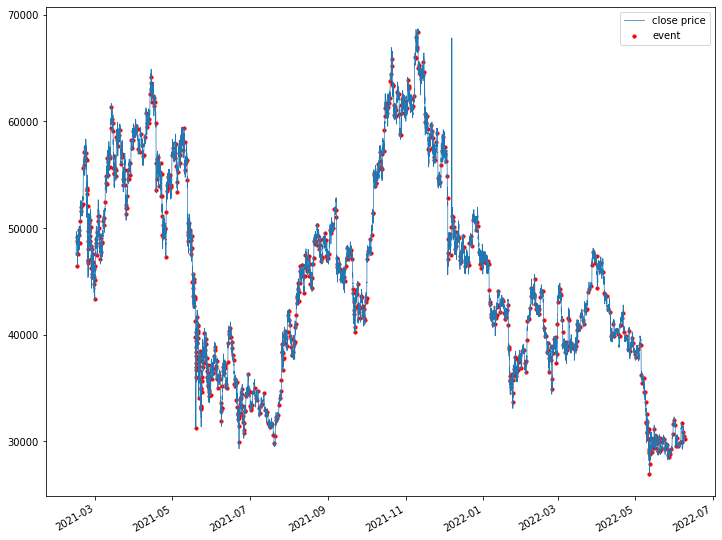

In [229]:
 plt.gcf().autofmt_xdate() 
 
 # example 
 fig,ax=plt.subplots(figsize=(12,10))
 ax.plot(df['close'],label='close price',linewidth=0.7)
 ax.scatter(x=event_index,y=df.loc[event_index,'close'].drop_duplicates(),color='r',s=10,label='event')
 plt.gcf().autofmt_xdate() 
 ax.legend(bbox_to_anchor=(1,1))

In [228]:
len(event_index)

955

In [224]:
len(df['close'].drop_duplicates())

32249

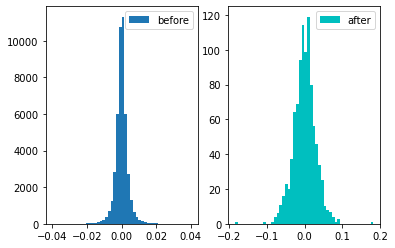

In [248]:
# Check the statistical properties of these two
# 1. return normality
fig,ax=plt.subplots(1,2)
ax[0].hist(df['close'].pct_change(),range=[-0.04,0.04],rwidth=1,bins=50,label='before')
ax[1].hist(df['close'].loc[event_index].pct_change(),rwidth=1,bins=50,label='after',color='c')
ax[0].legend()
ax[1].legend()

In [250]:
# 2. stationarity
adfuller(df['close'])

(-1.6591715355141523,
 0.4522616975765623,
 23,
 45791,
 {'1%': -3.430492815544899,
  '5%': -2.8616031214099427,
  '10%': -2.566803597461159},
 626852.9978142679)

In [251]:
adfuller(df['close'].loc[event_index])

(-1.824175077283565,
 0.3685271973269094,
 0,
 954,
 {'1%': -3.43722314744835,
  '5%': -2.8645743628401763,
  '10%': -2.5683856650361054},
 15991.367205281413)